# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


### 讀讀看「test」資料夾下的圖檔！

In [271]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO

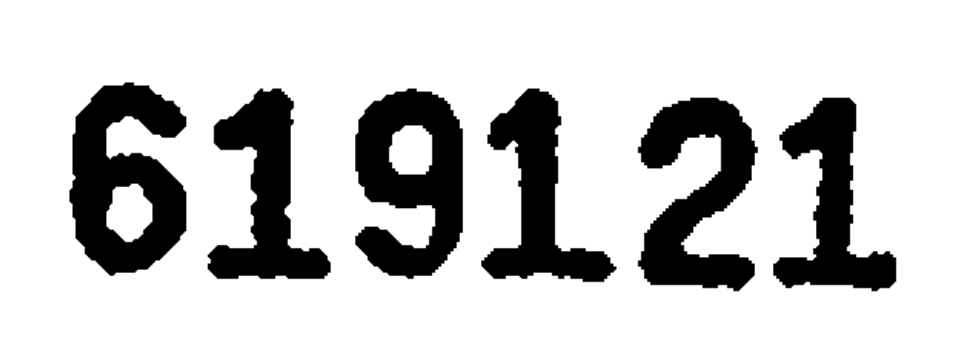

In [272]:
img = Image.open("test/test1.png").convert("L")
img

In [273]:
code = pytesseract.image_to_string(img)
print(code)

619121


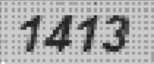

In [274]:
img = Image.open("test/test2.png").convert("L")
img

In [275]:
code = pytesseract.image_to_string(img)
print(code)

4413


### 像 test/test2.png 這種複雜的圖片怎麼辦？

In [276]:
def binarizing(img,threshold): #input: gray image
    pixdata = img.load()
    w, h = img.size
    for y in range(h):
        for x in range(w):
            if pixdata[x, y] < threshold:
                pixdata[x, y] = 0
            else:
                pixdata[x, y] = 255
    return img

In [277]:
def depoint(img):   #input: gray image
    pixdata = img.load()
    w,h = img.size
    for y in range(1,h-1):
        for x in range(1,w-1):
            count = 0
            if pixdata[x,y-1] > 245:
                count = count + 1
            if pixdata[x,y+1] > 245:
                count = count + 1
            if pixdata[x-1,y] > 245:
                count = count + 1
            if pixdata[x+1,y] > 245:
                count = count + 1
            if count > 2:
                pixdata[x,y] = 255
    return img


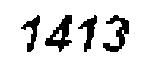

In [278]:
img = Image.open("test/test2.png").convert("L")
img = binarizing(img, 100)
img = depoint(img)
img

In [270]:
code = pytesseract.image_to_string(img)
print(code)

1413
